In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
def display(img):
    plt.figure(figsize = (10,8))
    plt.imshow(img)

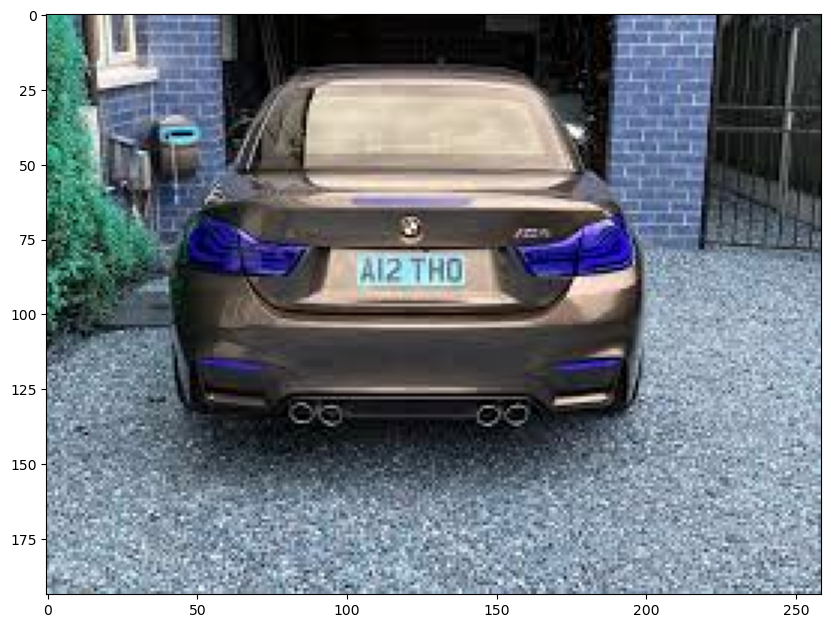

In [8]:
img = cv2.imread('carr.jpg')
display(img)

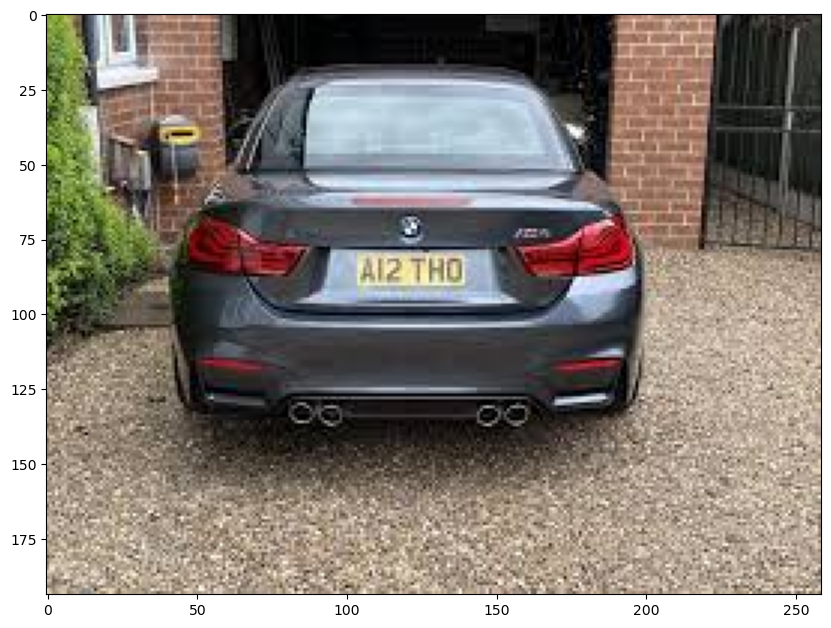

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

In [16]:
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [33]:
def detect_plate(img):
    
  
    plate_img = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img, minNeighbors = 2) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 3) 
        
    return plate_img

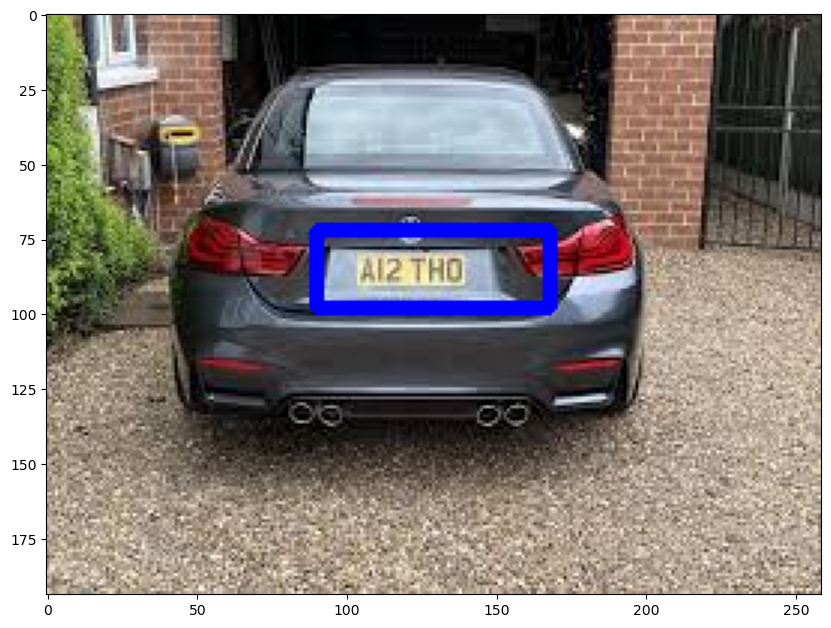

In [34]:
result = detect_plate(img)
display(result)

In [37]:
def detect_and_blur_plate(img):

    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img, minNeighbors=2) 
    
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

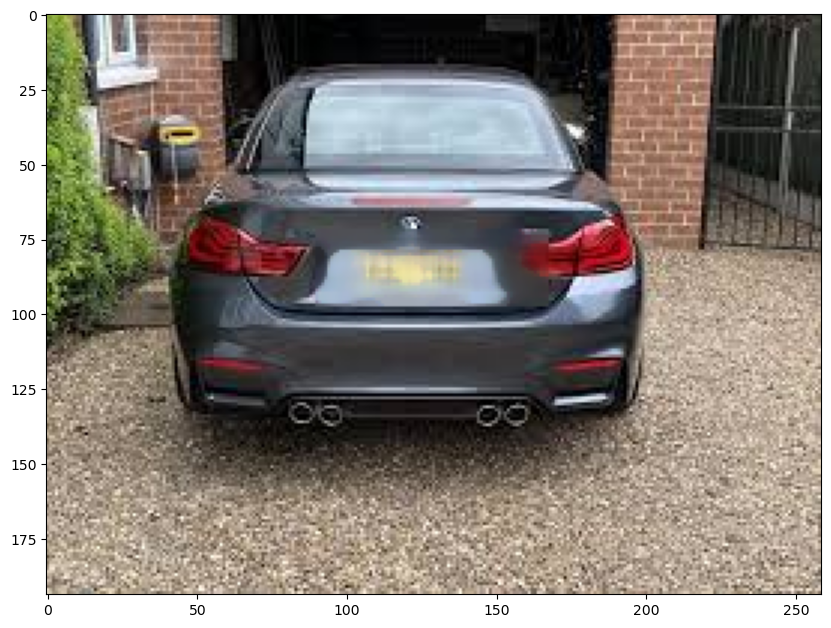

In [38]:
result = detect_and_blur_plate(img)
display(result)